In [498]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

# Leitura das tabelas
df_stats = pd.read_csv("tb_lobby_stats_player.csv")
df_medalha = pd.read_csv("tb_medalha.csv")
df_players_medalha = pd.read_csv("tb_players_medalha.csv")
df_players = pd.read_csv("tb_players.csv")

## Análise Básica do Dataset e Tratamento de Dados
Analisando cada dataframe individualmente

In [499]:
pd.set_option('display.max_columns', 38)

df_stats: Possui dados da performance dos jogadores em várias partidas

In [500]:
# Printando as 5 primeiras linhas
df_stats.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


idLobbyGame: código único de identificação do lobby <br/>
idPlayer: código único de identificação do player<br/>
idRoom: <br/>
qtKill: qt. de "Kills" que o jogador fez nessa partida <br/>
qtAssist: qt. de Assistências que o jogador fez nessa partida <br/>
qtDeath: qt. de vezes que o jogador morreu <br/>
qtHs: qt. de "Headshots" que o jogador tomou <br/>
qtBombeDefuse: qt. de Bombas Defusadas pelo jogador <br/>
qtBombePlant: qt. de Bombas Plantadas pelo jogador <br/>
qtTk: qt.de "Team Kills" que o jogador realizou (HE ou Molotov) <br/>
qtTkAssist: qt. de assistências para matar um companheiro de time o jogador fez <br/>
qt1Kill: qt. de rounds que o jogador fez 1 kill <br/>
qt2Kill: qt. de rounds que o jogador fez 2 kills <br/>
qt3Kill: qt. de rounds que o jogador fez 3 kills <br/>
qt4Kill: qt. de rounds que o jogador fez 4 kills <br/>
qt5Kill: qt. de rounds que o jogador fez 5 kills <br/>
qtPlusKill: rounds que o jogador fez mais de 5 kills (impossível, portanto só tem valores nulos) <br/>
qtFirstKill: qt. de rounds que o jogador fez a 1ª kill <br/>
vlDamage: Dano total que o jogador realizou <br/>
qtHits: número total de hits que o jogador realizou <br/>
qtShots: qt. de tiros dados <br/>
qtLastAlive: qt. de rounds que foi o último vivo <br/>
qtClutchWon: qt. de clutchs ganhos <br/>
qtRoundsPlayed: qt. de rounds jogados <br/>
descMapName: nome do mapa jogado <br/>
vlLevel: Level do jogador na GC <br/>
qtSurvived: número de rounds sobrevividos <br/>
qtTrade: número de "trade kills" <br/>
qtFlashAssist: número de assistências realizadas com flash <br/>
qtHitHeadshot: qt. de hits na cabeça feitos <br/>
qtHitChest: qt. de hits no peito feitos <br/>
qtHitStomach: qt. de hits no estômago realizados <br/>
qtHitLeftArm: qt. de hits no braço esquerdo realizados <br/>
qtHitRightArm: qt. de hits no braço direito realizados <br/>
qtHitLeftLeg: qt. de hits na perna esquerda realizados <br/>
qtHitRightLeg: qt. de hits na perna direita realizados <br/>
flWinner: flag de vitória/derrota na partida <br/>
dtCreatedAt: data e horário da partida <br/>





In [501]:
df_stats.set_index(["idLobbyGame", "idPlayer"])

idRoom  qtKill  qtAssist  qtDeath  qtHs  qtBombeDefuse  \
idLobbyGame idPlayer                                                           
1           1              1       5         1       16     2              0   
2           1              2      24         3       18     6              0   
3           2              3       6         4       23     2              0   
            391        27508      10         5       20     4              1   
4           2              4       8         4       26     6              0   
...                      ...     ...       ...      ...   ...            ...   
172907      2716      178496      21         3       13     5              1   
172908      2716      178497      15         1       22     5              0   
172909      2716      178498       9         6       23     2              0   
172910      2716      178499      15         5       20     6              0   
172911      2716      178500      12         6       11     4              0   

                      qtBombePlant  qtTk  qtTkAssist  qt1Kill  qt2Kill  \
idLobbyGame idPlayer                                                     
1           1                    0   0.0         0.0        3        1   
2           1                    4   0.0         1.0        9        4   
3           2                    1   0.0         1.0        4        1   
            391                  0   0.0         0.0        6        2   
4           2                    2   0.0         0.0        4        2   
...                            ...   ...         ...      ...      ...   
172907      2716                 1   0.0         0.0        8        5   
172908      2716                 1   0.0         0.0       11        2   
172909      2716                 3   0.0         0.0        9        0   
172910      2716                 2   0.0         0.0       13        1   
172911      2716                 1   0.0         0.0        7        1   

                      qt3Kill  qt4Kill  qt5Kill  qtPlusKill  qtFirstKill  \
idLobbyGame idPlayer                                                       
1           1               0        0        0           0            1   
2           1               1        1        0           0            3   
3           2               0        0        0           0            2   
            391             0        0        0           0            1   
4           2               0        0        0           0            1   
...                       ...      ...      ...         ...          ...   
172907      2716            1        0        0           0            3   
172908      2716            0        0        0           0            5   
172909      2716            0        0        0           0            2   
172910      2716            0        0        0           0            1   
172911      2716            1        0        0           0            1   

                      vlDamage  qtHits  qtShots  qtLastAlive  qtClutchWon  \
idLobbyGame idPlayer                                                        
1           1              911    25.0      212          0.0            0   
2           1             2933    54.0      597          1.0            1   
3           2             1117    31.0      207          0.0            0   
            391           1740    63.0      411          1.0            1   
4           2             1696    51.0      324          0.0            0   
...                        ...     ...      ...          ...          ...   
172907      2716          2610    88.0      524          1.0            0   
172908      2716          2154    63.0      357          0.0            0   
172909      2716          1701    59.0      371          0.0            0   
172910      2716          2246    65.0      355          0.0            0   
172911      2716          2119    49.0      459          0.0            0   

                      qtRou

In [502]:
df_stats.drop(['qtPlusKill', 'idRoom'], axis = 'columns', inplace=True)

In [503]:
df_player_kill = df_stats.groupby('idPlayer')['qtKill'].agg(['count','mean','sum']).add_suffix('_kill')
df_player_kill = df_player_kill[df_player_kill['count_kill']>100]

df_player_death = df_stats.groupby('idPlayer')['qtDeath'].agg(['mean','sum']).add_suffix('_death')

df_player_qtHs = df_stats.groupby('idPlayer')['qtHs'].agg(['mean','sum']).add_suffix('_hs')

df_player_kill_death = df_player_kill.merge(df_player_death, on = 'idPlayer').merge(df_player_qtHs, on = 'idPlayer')


df_player_kill_death

,count_kill,mean_kill,sum_kill,mean_death,sum_death,mean_hs,sum_hs
idPlayer,,,,,,,
10,615,21.104065,12979,20.255285,12457,11.995122,7377
11,223,15.582960,3475,19.049327,4248,5.484305,1223
19,198,20.474747,4054,18.843434,3731,7.929293,1570
20,666,23.714715,15794,18.213213,12130,11.070571,7373
22,233,15.416309,3592,18.227468,4247,7.158798,1668
...,...,...,...,...,...,...,...
2699,345,18.269565,6303,19.773913,6822,4.872464,1681
2704,144,16.201389,2333,17.763889,2558,5.854167,843
2710,168,23.785714,3996,19.357143,3252,10.773810,1810


In [504]:
# Printando dados descritivos do dataframe
df_stats.describe()

,idLobbyGame,idPlayer,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
count,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184032.000000,184032.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184032.000000,184152.000000,184032.000000,184152.000000,184152.000000,184152.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,184152.000000
mean,84720.886854,1361.148622,19.113531,3.756033,18.792459,7.640123,0.316054,1.321349,0.022463,0.249299,8.009943,3.430107,1.066874,0.221105,0.024958,2.698005,2500.991268,64.277283,454.456085,0.713985,0.469308,26.461054,13.668350,6.954079,3.095254,0.570012,9.642889,29.305194,13.525509,1.902511,5.106091,2.265641,2.496509,0.493766
std,49931.048091,784.157397,7.481041,2.205265,5.211614,4.042324,0.575803,1.336699,0.156566,0.550563,3.043061,2.050622,1.129075,0.492353,0.159542,1.949036,878.257039,22.922513,171.299525,1.293137,0.714377,5.873889,4.684848,3.238449,1.885027,0.906774,4.769723,11.657993,7.102067,1.650325,2.924184,2.062294,2.162557,0.499962
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41399.750000,676.000000,14.000000,2.000000,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1926.000000,49.000000,341.000000,0.000000,0.000000,23.000000,10.000000,5.000000,2.000000,0.000000,6.000000,21.000000,8.000000,1.000000,3.000000,1.000000,1.000000,0.000000
50%,83838.500000,1388.000000,19.000000,4.000000,19.000000,7.000000,0.000000,1.000000,0.000000,0.000000,8.000000,3.000000,1.000000,0.000000,0.000000,2.000000,2453.000000,63.000000,435.000000,0.000000,0.000000,27.000000,14.000000,7.000000,3.000000,0.000000,9.000000,28.000000,13.000000,2.000000,5.000000,2.000000,2.000000,0.000000
75%,127911.250000,2061.000000,24.000000,5.000000,22.000000,10.000000,1.000000,2.000000,0.000000,0.000000,10.000000,5.000000,2.000000,0.000000,0.000000,4.000000,3017.000000,78.000000,546.000000,1.000000,1.000000,29.000000,18.000000,9.000000,4.000000,1.000000,12.000000,36.000000,18.000000,3.000000,7.000000,3.000000,4.000000,1.000000
max,172911.000000,2716.000000,85.000000,24.000000,65.000000,41.000000,5.000000,12.000000,12.000000,9.000000,31.000000,16.000000,11.000000,6.000000,3.000000,20.000000,10794.000000,277.000000,2131.000000,29.000000,8.000000,84.000000,21.000000,37.000000,20.000000,14.000000,49.000000,122.000000,77.000000,17.000000,30.000000,21.000000,22.000000,1.000000


In [505]:
# Verificando as colunas com valores nulos
df_stats.isnull().sum()

idLobbyGame         0
idPlayer            0
qtKill              0
qtAssist            0
qtDeath             0
qtHs                0
qtBombeDefuse       0
qtBombePlant        0
qtTk              120
qtTkAssist        120
qt1Kill             0
qt2Kill             0
qt3Kill             0
qt4Kill             0
qt5Kill             0
qtFirstKill         0
vlDamage            0
qtHits            120
qtShots             0
qtLastAlive       120
qtClutchWon         0
qtRoundsPlayed      0
descMapName         0
vlLevel             0
qtSurvived        705
qtTrade           705
qtFlashAssist     705
qtHitHeadshot     705
qtHitChest        705
qtHitStomach      705
qtHitLeftAtm      705
qtHitRightArm     705
qtHitLeftLeg      705
qtHitRightLeg     705
flWinner            0
dtCreatedAt         0
dtype: int64

Os dados nulos indicam que o jogador, provavelmente, não jogou aquela partida. Não queremos esses dados, portanto, devemos dropar essas linhas

In [506]:
df_stats = df_stats.dropna()

df_medalha: Possui dados acerca de 47 medalhas disponíveis na plataforma

In [507]:
# Printando as 5 primeiras linhas
df_medalha.head()

,idMedal,descMedal,descTypeMedal
0,1,Membro Premium,MEDAL
1,2,Elite,MEDAL
2,3,Membro Plus,MEDAL
3,4,Bom Comportamento,MEDAL
4,5,Já conquistou 25 Vitórias,MEDAL


idMedal: código único de identificação da medalha <br/>
descMedal: nome da medalha<br/>
descTypeMedal: tipo da medalha

In [508]:
df_medalha.set_index("idMedal")

,descMedal,descTypeMedal
idMedal,,
1,Membro Premium,MEDAL
2,Elite,MEDAL
3,Membro Plus,MEDAL
4,Bom Comportamento,MEDAL
5,Já conquistou 25 Vitórias,MEDAL
6,Pilar da Comunidade,MEDAL
7,Já conquistou 10 Vitórias,MEDAL
8,Tribo Gaules,MEDAL
9,Terminou o tutorial da Gamers Club,MEDAL


In [509]:
# Printando dados descritivos do dataframe
df_medalha.describe()

,idMedal
count,47.000000
mean,24.000000
std,13.711309
min,1.000000
25%,12.500000
50%,24.000000
75%,35.500000
max,47.000000


In [510]:
# Verificando as colunas com valores nulos
df_medalha.isnull().sum()

idMedal          0
descMedal        0
descTypeMedal    0
dtype: int64

df_players_medalhas: Possui dados acerca das medalhas que os jogadores possuem

In [511]:
# Printando as 5 primeiras linhas
df_players_medalha.head()

,id,idPlayer,idMedal,dtCreatedAt,dtExpiration,dtRemove,flActive
0,1,1982,1,2018-10-04,2016-07-23,2016-07-24,0
1,2,1982,1,2018-12-12,2017-01-11,2017-01-12,0
2,3,1982,1,2019-01-08,2017-03-16,2017-03-17,0
3,4,1982,1,2018-12-09,2017-09-10,2017-09-11,0
4,5,1982,1,2018-10-04,2018-03-19,2018-03-20,0


In [512]:
df_qt_medalha = df_players_medalha.groupby('idPlayer')['idMedal'].count().to_frame(name = 'qtMedalha').reset_index()
df_qt_medalha.sort_values("qtMedalha")

,idPlayer,qtMedalha
1626,1627,1
1406,1407,1
1411,1412,1
1416,1417,1
1420,1421,1
...,...,...
51,52,102
2373,2374,103
1237,1238,104
756,757,107


In [513]:
# Printando dados descritivos do dataframe
df_players_medalha.describe()

,id,idPlayer,idMedal,flActive
count,32700.000000,32700.000000,32700.000000,32700.000000
mean,16350.500000,1358.040153,10.839817,0.463089
std,9439.821238,773.713929,12.927795,0.498643
min,1.000000,1.000000,1.000000,0.000000
25%,8175.750000,701.750000,3.000000,0.000000
50%,16350.500000,1340.000000,4.000000,0.000000
75%,24525.250000,2036.000000,15.000000,1.000000
max,32700.000000,2716.000000,47.000000,1.000000


In [514]:
# Verificando as colunas com valores nulos
df_players_medalha.isnull().sum()

id                  0
idPlayer            0
idMedal             0
dtCreatedAt         0
dtExpiration    17347
dtRemove        16778
flActive            0
dtype: int64

As colunas "dtCreatedAt" e "dtExpiration" podem possuir valores nulos, já que esses dados podem não existir para determinados casos

df_players: Possui dados acerca dos perfis dos jogadores na plataforma

In [515]:
# Printando as 5 primeiras linhas
df_players.head()

,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,NaN,2021-03-19 21:31:39
1,2,0,0,0,br,NaN,2020-05-06 19:28:29
2,3,0,0,0,br,NaN,2020-01-28 13:00:38
3,4,0,0,0,br,NaN,2017-05-31 16:13:51
4,5,0,0,0,ar,NaN,2021-02-08 11:57:21


idPlayer: código de identificação do jogador <br/>
flFacebook: indica se o Facebook do jogador está ativo no perfil <br/>
flTwitter: indica se o Twitter do jogador está ativo no perfil <br/>
flTwitch: indica se o Twitch do jogador está ativo no perfil <br/>
descCountry: país do jogador <br/>
dtBirth: data de nascimento do jogador <br/>
dtRegistration: data de registro na plataforma <br/>

In [516]:
#df_players.set_index("idPlayer")

In [517]:
# Printando dados descritivos do dataframe
df_players.describe()

,idPlayer,flFacebook,flTwitter,flTwitch
count,2716.00000,2716.000000,2716.000000,2716.000000
mean,1358.50000,0.023196,0.016200,0.019514
std,784.18599,0.150553,0.126268,0.138348
min,1.00000,0.000000,0.000000,0.000000
25%,679.75000,0.000000,0.000000,0.000000
50%,1358.50000,0.000000,0.000000,0.000000
75%,2037.25000,0.000000,0.000000,0.000000
max,2716.00000,1.000000,1.000000,1.000000


In [518]:
# Verificando as colunas com valores nulos
df_players.isnull().sum()

idPlayer            0
flFacebook          0
flTwitter           0
flTwitch            0
descCountry         0
dtBirth           708
dtRegistration      0
dtype: int64

Alguns jogadores não inseriram suas datas de nascimento em seus perfis. Como vamos utilizar esses dados nas análises, devemos excluir esses jogadores da tabela

In [519]:
df_players = df_players.dropna()

In [520]:
df_players['dtNasc'] = pd.to_datetime(df_players['dtBirth'].astype(str))
df_players['dtReg'] = pd.to_datetime(df_players['dtRegistration'].astype(str))
df_players.drop(['flFacebook', 'flTwitter', 'flTwitch','dtBirth','dtRegistration'], axis = 'columns', inplace=True)


In [521]:
today = date.today
def Calc_idade (idade_col, nasc_col):
    df_players[idade_col] = today.year - df_players[nasc_col].dt.year

In [522]:
today = date.today()
Calc_idade('idade','dtNasc')
Calc_idade('idade_gc', 'dtReg')
df_players.head()

,idPlayer,descCountry,dtNasc,dtReg,idade,idade_gc
5,6,br,2002-03-23,2019-01-09 19:24:27,20,3
8,9,ar,2000-05-03,2016-05-22 15:12:48,22,6
9,10,br,2005-04-15,2018-02-28 11:29:11,17,4
10,11,br,1994-10-28,2016-09-01 20:21:33,28,6
12,13,br,2000-05-01,2016-09-05 11:42:21,22,6


Estudar joins datacamp pra juntar as tabelas

### Juntando as tabelas - pd.merge

In [523]:
#pd.merge(df_players, df_qt_medalha, on = 'idPlayer').sort_values(by='idPlayer')

stats_players_medalha = df_players.merge(df_qt_medalha, on = 'idPlayer').merge(df_player_kill_death, on='idPlayer').sort_values('count_kill')

stats_players_medalha.drop(['dtNasc', 'dtReg'], axis = 'columns', inplace = True)

stats_players_medalha['K/D'] = stats_players_medalha['sum_kill']/stats_players_medalha['sum_death']

stats_players_medalha.set_index('idPlayer', inplace=True)

stats_players_medalha

,descCountry,idade,idade_gc,qtMedalha,count_kill,mean_kill,sum_kill,mean_death,sum_death,mean_hs,sum_hs,K/D
idPlayer,,,,,,,,,,,,
2357,br,17,2,3,101,16.227723,1639,19.178218,1937,5.594059,565,0.846154
1420,ar,35,4,43,101,18.485149,1867,18.960396,1915,10.475248,1058,0.974935
1706,br,20,2,4,101,18.683168,1887,18.831683,1902,9.534653,963,0.992114
510,br,35,7,54,101,18.465347,1865,19.910891,2011,7.990099,807,0.927399
2508,br,19,3,4,101,20.356436,2056,19.653465,1985,10.128713,1023,1.035768
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,br,21,4,69,625,20.713600,12946,18.667200,11667,9.820800,6138,1.109625
20,cl,25,5,73,666,23.714715,15794,18.213213,12130,11.070571,7373,1.302061
2289,ar,21,5,71,677,20.194978,13672,19.658789,13309,10.982275,7435,1.027275


In [524]:
#Fazer coorrelações e plotar gráficos: desempenho x qt_medalhas; desempenho x idade; desempenho x idade_gc

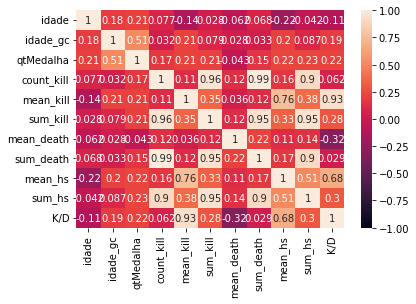

In [525]:
# Criando a matriz de correlação entre todas as colunas
correlacao = stats_players_medalha.corr(method='pearson')
sns.heatmap(correlacao, annot = True, vmin=-1, vmax=1)
plt.show()

O desempenho de um jogador reflete na quantidade de medalhas (de desempenho) que ele possui? <br/>
Hipótese:  Sim, pois o jogador deve cumprir missões para ganhar essas medalhas.

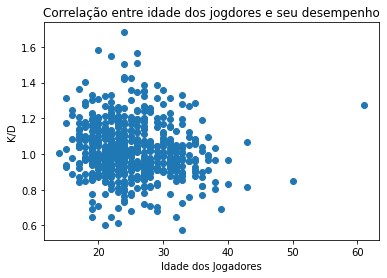

In [526]:
plt.scatter(stats_players_medalha['idade'],stats_players_medalha['K/D'])
plt.title('Correlação entre idade dos jogdores e seu desempenho')
plt.ylabel('K/D')
plt.xlabel('Idade dos Jogadores')
plt.show()

O número de kills está relacionado com a quantidade de headshots? <br/>
Hipótese: Existe uma relação de quanto maior a quantidade de kills, maior a quantidade de headshots.


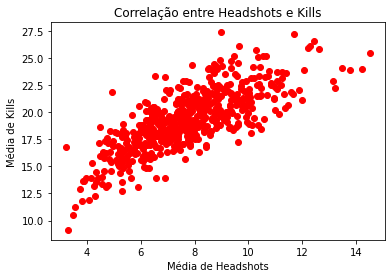

In [527]:
plt.scatter(stats_players_medalha['mean_hs'],stats_players_medalha['mean_kill'], color = 'red')
plt.title('Correlação entre Headshots e Kills')
plt.ylabel('Média de Kills')
plt.xlabel('Média de Headshots')
plt.show()

In [528]:
#rows_n_desempenho = [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 16, 29, 30, 32, 33, 37, 38, 39, 42, 43, 45, 46, 47] + [10, 11, 12, 13, 14] + [17, 23]
#df_new_players_medalha = df_players_medalha.drop(df_players_medalha['idMedal'].isin(rows) , axis = 0)
df_new_players_medalha = df_players_medalha[~df_players_medalha['idMedal'].isin(rows)]

In [529]:
df_new_players_medalha

,id,idPlayer,idMedal,dtCreatedAt,dtExpiration,dtRemove,flActive
14272,14,1982,10,2020-04-03,NaN,NaN,1
14273,185,1668,10,2020-02-01,2020-03-30,2020-03-30,0
14274,347,791,10,2019-08-02,2019-08-28,2019-08-28,0
14275,504,1098,10,2019-11-06,NaN,NaN,1
14276,626,757,10,2019-06-02,2019-07-01,2019-07-01,0
...,...,...,...,...,...,...,...
32438,31500,2517,22,2021-01-21,NaN,NaN,1
32439,31620,788,22,2021-05-24,NaN,NaN,1
32440,31731,2277,22,2021-08-02,NaN,NaN,1
32441,31866,681,22,2021-09-05,NaN,NaN,1
